### Import libriaries

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error

### Loading dataset

<b> Feature description </b>

<b>price</b>: price in US dollars. This is the target column 

<b>carat</b>: weight of the diamond

<b>cut</b>: quality of the cut (Fair, Good, Very Good, Premium, Ideal)

<b>color</b>: diamond colour, from J (worst) to D (best)

<b>clarity</b>: a measurement of how clear the diamond is (I1 (worst), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (best))

<b>x</b>: length in mm 

<b>y</b>: width in mm

<b>z</b>: depth in mm

<b>depth</b>: total depth percentage = z / mean(x, y) = 2 * z / (x + y)

<b>table</b>: width of top of diamond relative to widest point 



In [2]:
diamonds = pd.read_csv("../datasets/diamonds/diamonds.csv")
diamonds

,carat,cut,color,clarity,depth,table,price,x,y,z
0,1.10,Ideal,H,SI2,62.0,55.0,4733,6.61,6.65,4.11
1,1.29,Ideal,H,SI1,62.6,56.0,6424,6.96,6.93,4.35
2,1.20,Premium,I,SI1,61.1,58.0,5510,6.88,6.80,4.18
3,1.50,Ideal,F,SI1,60.9,56.0,8770,7.43,7.36,4.50
4,0.90,Very Good,F,VS2,61.7,57.0,4493,6.17,6.21,3.82
...,...,...,...,...,...,...,...,...,...,...
4995,0.38,Ideal,H,VVS2,62.3,53.3,832,4.65,4.69,2.91
4996,0.33,Premium,G,VVS2,61.3,59.0,927,4.45,4.42,2.72
4997,1.25,Ideal,J,VVS2,62.1,56.0,5980,6.81,6.84,4.24
4998,0.31,Premium,F,VS2,62.9,58.0,802,4.31,4.27,2.70


### Data preprocessing

<b> Steps involved in Data Preprocessing </b>

- Data cleaning
- Data visualization
- Encoding categorical variables
- Identifying and removing outliers with box plot and IQR

In [3]:
diamonds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    5000 non-null   float64
 1   cut      5000 non-null   object 
 2   color    5000 non-null   object 
 3   clarity  5000 non-null   object 
 4   depth    5000 non-null   float64
 5   table    5000 non-null   float64
 6   price    5000 non-null   int64  
 7   x        5000 non-null   float64
 8   y        5000 non-null   float64
 9   z        5000 non-null   float64
dtypes: float64(6), int64(1), object(3)
memory usage: 390.8+ KB


In [4]:
diamonds.describe()

,carat,depth,table,price,x,y,z
count,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000,5000.000000
mean,0.794486,61.711660,57.447060,3925.53940,5.725188,5.727744,3.533076
std,0.468424,1.446206,2.258999,3975.45212,1.119156,1.112106,0.690334
min,0.230000,44.000000,51.600000,-1.00000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,936.00000,4.700000,4.710000,2.900000
50%,0.700000,61.800000,57.000000,2392.50000,5.690000,5.700000,3.530000
75%,1.040000,62.500000,59.000000,5369.25000,6.540000,6.540000,4.030000
max,4.130000,70.200000,95.000000,18787.00000,10.000000,9.850000,6.430000


#### Check if there are null values and duplicated values

In [5]:
diamonds.isnull().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

In [6]:
diamonds.duplicated().sum()

1

In [7]:
diamondsDuplicateRows = diamonds[diamonds.duplicated()]
diamondsDuplicateRows

,carat,cut,color,clarity,depth,table,price,x,y,z
4943,0.31,Premium,E,VS2,61.6,59.0,872,4.35,4.32,2.67


In [8]:
diamonds.loc[(diamonds['carat'] == 0.31) & (diamonds['cut'] == 'Premium') & (diamonds['clarity'] == 'VS2') & (diamonds['x'] == 4.35) & (diamonds['y'] == 4.32)]

,carat,cut,color,clarity,depth,table,price,x,y,z
2429,0.31,Premium,E,VS2,61.6,59.0,872,4.35,4.32,2.67
4943,0.31,Premium,E,VS2,61.6,59.0,872,4.35,4.32,2.67


In [9]:
diamonds.drop_duplicates(inplace=True)

In [10]:
diamonds.duplicated().sum()

0

- The min of x,y,z there are some values equals to 0, and it's not possible to have a diamond dimensionless or bidimensional

In [11]:
x_zero = diamonds[diamonds['x'] == 0] 
y_zero = diamonds[diamonds['y'] == 0] 
z_zero = diamonds[diamonds['z'] == 0] 
   
print('\nResult x_zero :\n', x_zero)
print('\nResult y_zero :\n', y_zero)
print('\nResult z_zero :\n', z_zero)


Result x_zero :
       carat      cut color clarity  depth  table  price    x    y    z
4321   2.25  Premium     H     SI2   62.8   59.0  18034  0.0  0.0  0.0

Result y_zero :
       carat      cut color clarity  depth  table  price    x    y    z
4321   2.25  Premium     H     SI2   62.8   59.0  18034  0.0  0.0  0.0

Result z_zero :
       carat      cut color clarity  depth  table  price    x    y    z
4321   2.25  Premium     H     SI2   62.8   59.0  18034  0.0  0.0  0.0


- The price of diamond can't be less than zero, probably they are fault values

In [12]:
price_less_zero = diamonds[diamonds['price'] < 0] 
   
print('\nResult price_less_zero :\n', price_less_zero)


Result price_less_zero :
       carat        cut color clarity  depth  table  price     x     y     z
331    1.00       Good     F     SI1   64.1   60.0     -1  6.25  6.19  3.99
2121   0.34      Ideal     E     VS2   59.8   56.0     -1  4.55  4.54  2.72
2484   1.75      Ideal     J     SI1   63.3   59.0     -1  7.63  7.57  4.81
2933   1.51      Ideal     H     VS2   62.5   55.0     -1  7.29  7.34  4.57
3155   0.31      Ideal     G     VS2   61.7   57.0     -1  4.33  4.36  2.68
3317   1.02    Premium     D     VS2   59.8   61.0     -1  6.61  6.54  3.93
3445   0.30    Premium     H     SI1   59.3   59.0     -1  4.38  4.36  2.59
3904   0.90  Very Good     G     SI2   64.2   56.0     -1  6.04  6.11  3.90
3980   0.41  Very Good     H     VS2   63.4   58.0     -1  4.77  4.66  2.99
4188   0.79      Ideal     H    VVS1   62.0   56.0     -1  5.92  5.96  3.68


In [13]:
diamonds = diamonds.drop(diamonds[diamonds["x"]==0].index)
diamonds = diamonds.drop(diamonds[diamonds["y"]==0].index)
diamonds = diamonds.drop(diamonds[diamonds["z"]==0].index)
diamonds = diamonds.drop(diamonds[diamonds["price"]<0].index)

In [14]:
diamonds.describe()

,carat,depth,table,price,x,y,z
count,4988.000000,4988.000000,4988.000000,4988.000000,4988.000000,4988.000000,4988.000000
mean,0.794214,61.710866,57.445930,3931.195068,5.726508,5.729104,3.533851
std,0.467978,1.445707,2.259872,3971.085189,1.116199,1.109099,0.688397
min,0.230000,44.000000,51.600000,351.000000,3.860000,3.840000,1.410000
25%,0.400000,61.000000,56.000000,942.000000,4.700000,4.710000,2.900000
50%,0.700000,61.800000,57.000000,2398.000000,5.690000,5.700000,3.530000
75%,1.040000,62.500000,59.000000,5376.500000,6.540000,6.540000,4.030000
max,4.130000,70.200000,95.000000,18787.000000,10.000000,9.850000,6.430000


In [15]:
diamonds.shape

(4988, 10)

<Axes: title={'center': 'Cut'}, xlabel='cut'>

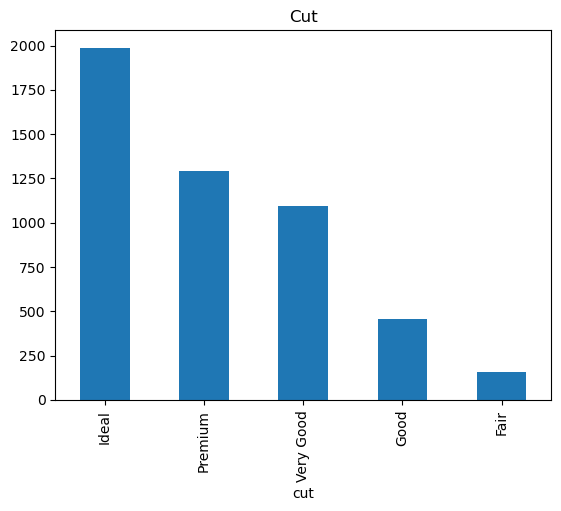

In [16]:
diamonds['cut'].value_counts().plot(kind='bar', title="Cut")

<Axes: title={'center': 'Color'}, xlabel='color'>

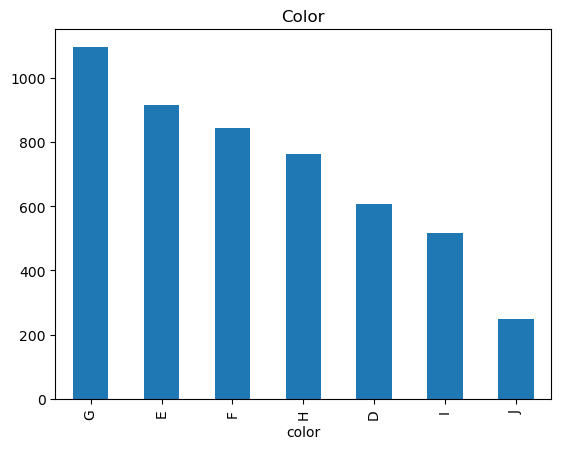

In [17]:
diamonds['color'].value_counts().plot(kind='bar', title="Color")

<Axes: title={'center': 'Clarity'}, xlabel='clarity'>

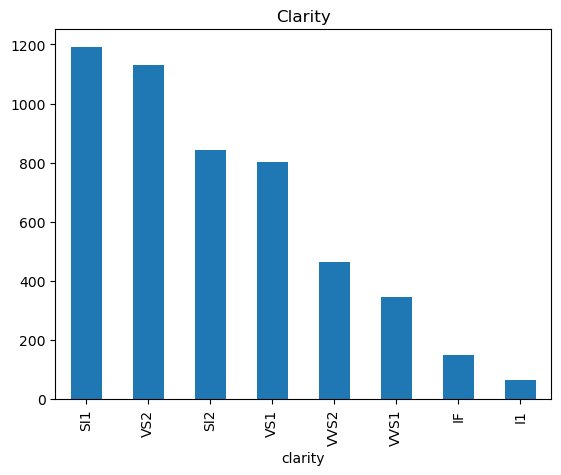

In [18]:
diamonds['clarity'].value_counts().plot(kind='bar', title="Clarity")

In [19]:
diamonds['cut'].replace(['Ideal', 'Premium', 'Very Good', 'Good', 'Fair'],
                 [0,1,2,3,4], inplace=True)
diamonds['color'].replace(['G', 'E', 'F', 'H', 'D', 'I', 'J'],
                 [0,1,2,3,4,5,6], inplace=True)
diamonds['clarity'].replace(['SI1', 'VS2', 'SI2', 'VS1', 'VVS2', 'VVS1', 'IF', 'I1'],
                 [0,1,2,3,4,5,6,7], inplace=True)

In [20]:
diamonds.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4988 entries, 0 to 4999
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    4988 non-null   float64
 1   cut      4988 non-null   int64  
 2   color    4988 non-null   int64  
 3   clarity  4988 non-null   int64  
 4   depth    4988 non-null   float64
 5   table    4988 non-null   float64
 6   price    4988 non-null   int64  
 7   x        4988 non-null   float64
 8   y        4988 non-null   float64
 9   z        4988 non-null   float64
dtypes: float64(6), int64(4)
memory usage: 428.7 KB


#### Correlation Map

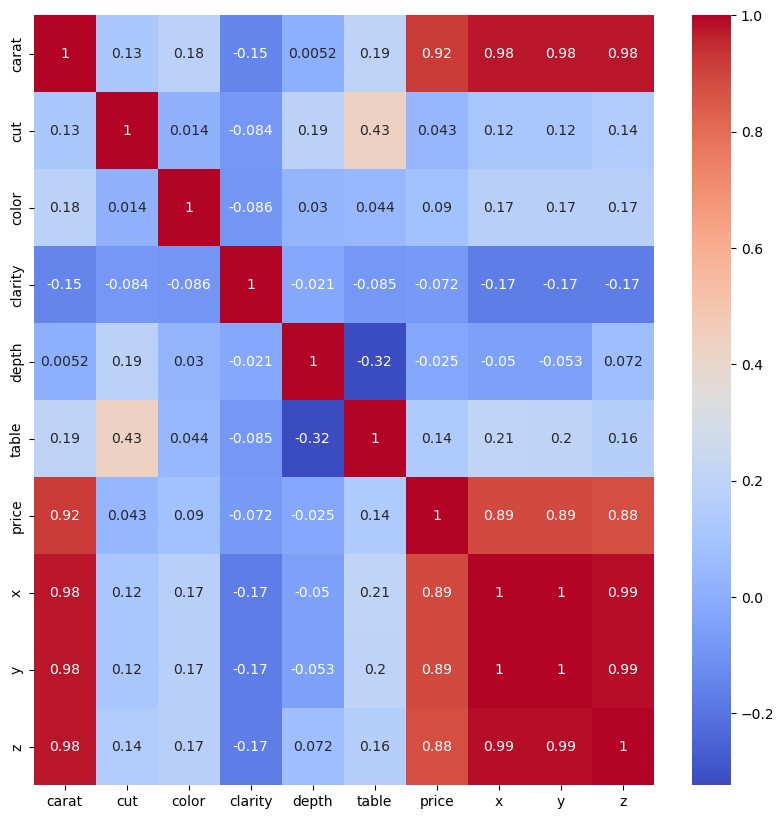

In [21]:
plt.figure(figsize=(10,10))
diamonds_corr_matrix = diamonds.corr()
sns.heatmap(diamonds_corr_matrix, cmap='coolwarm', annot=True)
plt.show()

- "x", "y", "z" and "carat" show a high correlation to the target column.
- the other features show low correlation. I could consider dropping but let's keep it.

#### Data visualization between target and features with best correlation

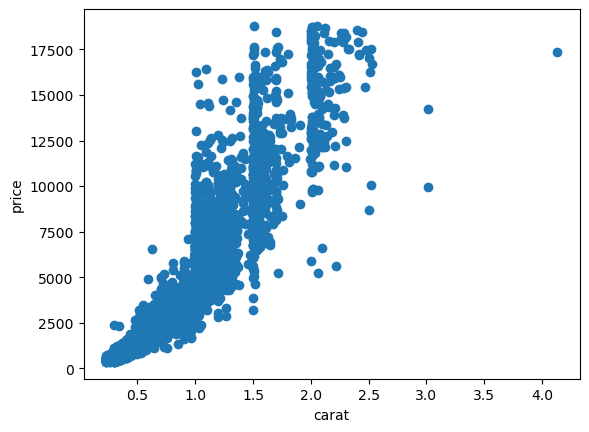

In [22]:
# seeing the best correlation of the correlation matrix 
plt.scatter(diamonds["carat"],diamonds["price"])
plt.xlabel("carat")
plt.ylabel("price")
plt.show()

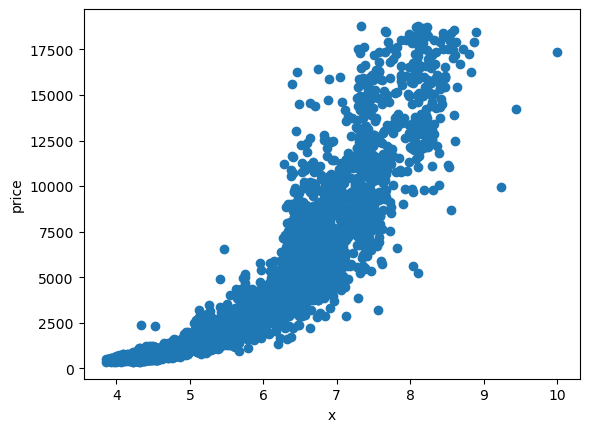

In [23]:
plt.scatter(diamonds["x"],diamonds["price"])
plt.xlabel("x")
plt.ylabel("price")
plt.show()

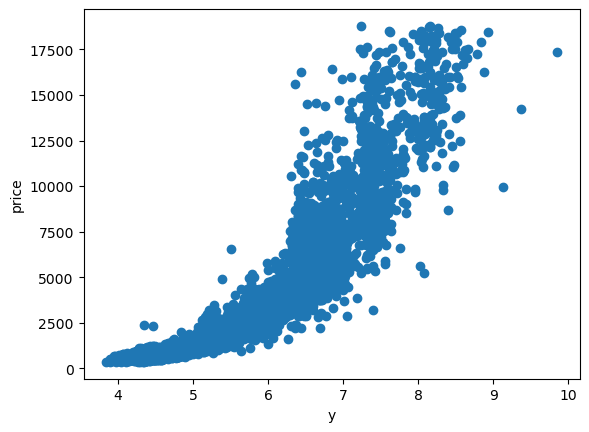

In [24]:
plt.scatter(diamonds["y"],diamonds["price"])
plt.xlabel("y")
plt.ylabel("price")
plt.show()

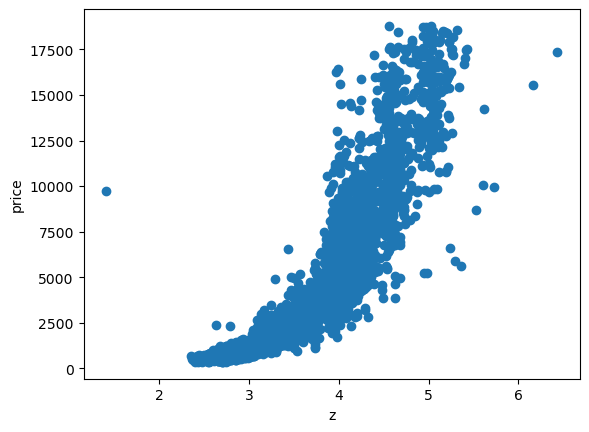

In [25]:
plt.scatter(diamonds["z"],diamonds["price"])
plt.xlabel("z")
plt.ylabel("price")
plt.show()

#### Data visualization between target and features with low correlation

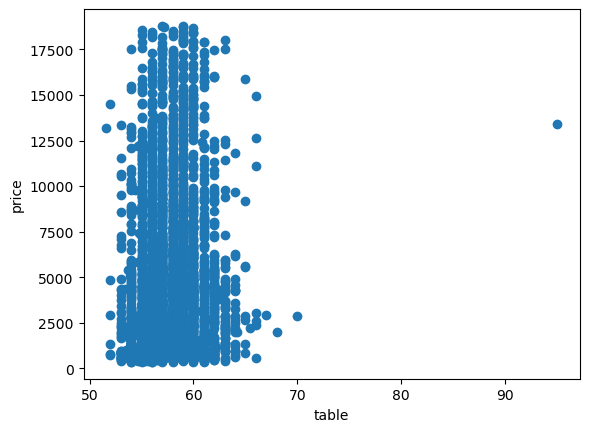

In [26]:
plt.scatter(diamonds["table"],diamonds["price"])
plt.xlabel("table")
plt.ylabel("price")
plt.show()

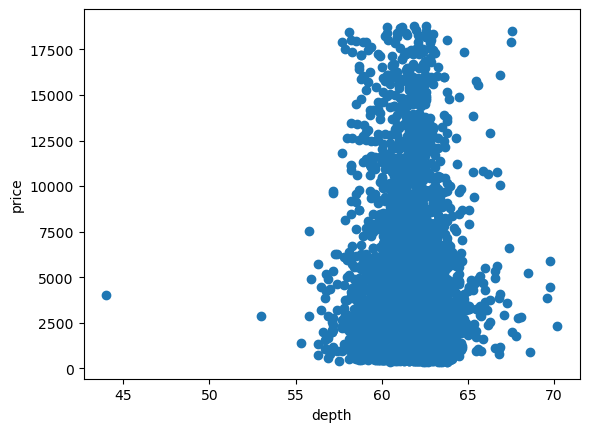

In [27]:
plt.scatter(diamonds["depth"],diamonds["price"])
plt.xlabel("depth")
plt.ylabel("price")
plt.show()

#### Search and remove outliers

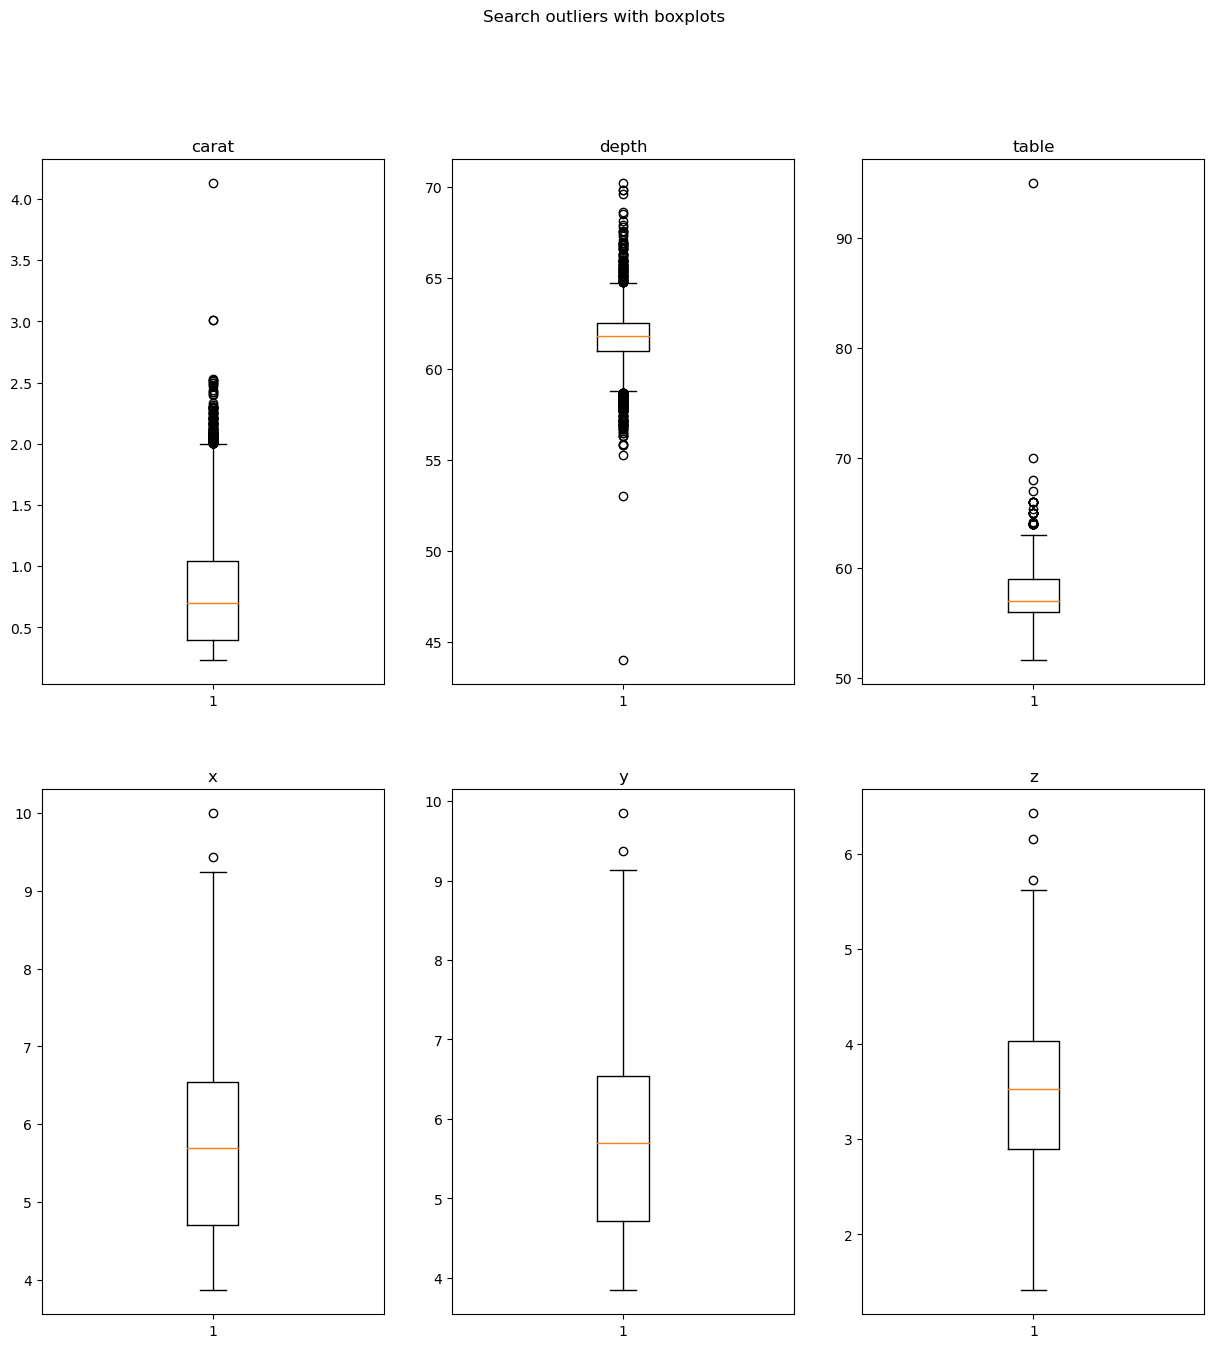

In [28]:

name_columns = ["carat","depth","table","x","y","z"]
count_columns = 0

fig, ax = plt.subplots(2,3,figsize=(15, 15))
fig.suptitle('Search outliers with boxplots')
for i in range(2):
    for j in range(3):
        ax[i,j].boxplot(diamonds[name_columns[count_columns]])
        ax[i,j].set_title(name_columns[count_columns])
        count_columns = count_columns + 1

In [29]:
def remove_outliers(name_column):
    q1=diamonds[name_column].quantile(0.25)
    q3=diamonds[name_column].quantile(0.75)
    iqr = q3 - q1
    lower_limit = q1 - 1.5*iqr
    upper_limit = q3 + 1.5*iqr
    diamonds_filtered = diamonds[(diamonds[name_column]>lower_limit) & (diamonds[name_column]<upper_limit)]
    return diamonds_filtered

In [30]:
name_columns = ["carat","depth","table","x","y","z"]

for column in name_columns:
    diamonds = remove_outliers(column)

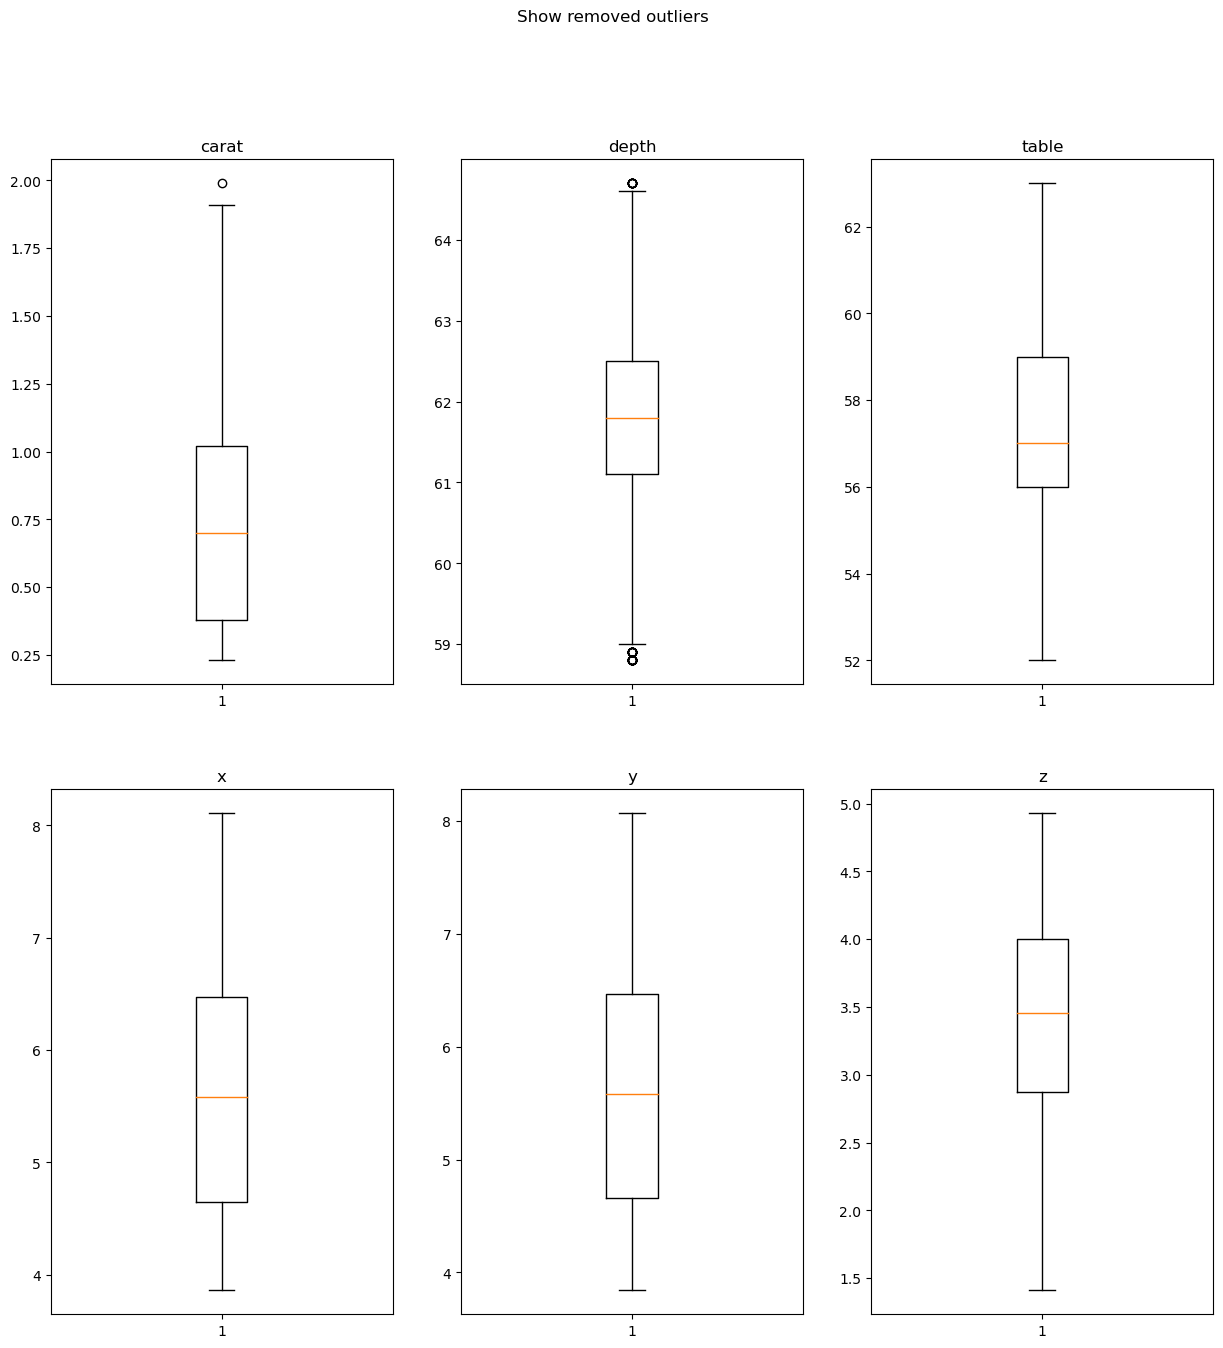

In [31]:
name_columns = ["carat","depth","table","x","y","z"]
count_columns = 0

fig, ax = plt.subplots(2,3,figsize=(15, 15))
fig.suptitle('Show removed outliers')
for i in range(2):
    for j in range(3):
        ax[i,j].boxplot(diamonds[name_columns[count_columns]])
        ax[i,j].set_title(name_columns[count_columns])
        count_columns = count_columns + 1

#### Model building

<b> Steps involved in Model Building </b>

- Setting up features and target
- Apply SearchGridCV for searching optimal hyperparameters
- Fit all the models (linear regression, random forest regression, decision tree regression) on training data
- Evaluate the model performance with regression metrics 

#### Which metrics are used to evaluate the model?

- <b> Mean Squared Error </b> (MSE) : The average squared difference between the predicted and actual values of the target variable. The better the model fits the data, the less the MSE score.
- <b> Root Mean Squared Error </b> (RMSE) : The square root of the mean squared error.
- <b> Mean Absolute Error </b> (MAE) : The average absolute difference between the predicted and actual values of the target variable.
- <b> R^2 Score </b> : R2 score is a metric that tells the performance of your model, i.e. how many wells did your model perform

In [32]:
def metrics(y_test, y_pred):
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    
    return mae, r2, mse, rmse

In [33]:
X= diamonds.drop(["price"],axis =1)
y= diamonds["price"]
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [34]:
linear_regression_model = LinearRegression()
linear_regression_model.fit(X_train, y_train)
y_pred_linear_regression = linear_regression_model.predict(X_test)

mae_linear_regression, r2_score_linear_regression, mse_linear_regression, rmse_linear_regression = metrics(y_test, y_pred_linear_regression)

print(f"MAE linear regression -> {mae_linear_regression}")
print(f"R2 score linear regression -> {r2_score_linear_regression}")
print(f"MSE linear regression -> {mse_linear_regression}")
print(f"RMSE linear regression -> {rmse_linear_regression}")


MAE linear regression -> 728.9389353000438
R2 score linear regression -> 0.8743366607183201
MSE linear regression -> 1269997.4345913755
RMSE linear regression -> 1126.9416287418685


In [35]:
linear_regression = ("Linear Regression", r2_score_linear_regression, mae_linear_regression, mse_linear_regression, rmse_linear_regression)

##### Search for optimal hyperparameter random forest

- <b> n_estimators </b> : number of trees in the random forest
- <b> max_depth </b> : the maximum depth of each decision tree in the forest
- <b> max_leaf_nodes </b> : each tree has a limited number of nodes

In [36]:
param_grid_random_forest = { 
    'n_estimators': [25, 50, 100, 150], 
    'max_depth': [3, 6, 9], 
    'max_leaf_nodes': [3, 6, 9], 
} 

In [37]:
grid_search_random_forest = GridSearchCV(RandomForestRegressor(), 
                           param_grid=param_grid_random_forest,cv=5) 
grid_search_random_forest.fit(X_train, y_train) 
print(grid_search_random_forest.best_estimator_) 

RandomForestRegressor(max_depth=6, max_leaf_nodes=9)


In [38]:
random_forest_model = RandomForestRegressor(max_depth=grid_search_random_forest.best_estimator_.max_depth, 
                                    max_leaf_nodes=grid_search_random_forest.best_estimator_.max_leaf_nodes, 
                                    n_estimators=grid_search_random_forest.best_estimator_.n_estimators)
random_forest_model.fit(X_train, y_train)
y_pred_random_forest = random_forest_model.predict(X_test)
mae_random_forest, r2_score_random_forest, mse_random_forest, rmse_random_forest = metrics(y_test, y_pred_random_forest)

print(f"MAE random forest regression -> {mae_random_forest}")
print(f"R2 score random forest regression -> {r2_score_random_forest}")
print(f"MSE random forest regression -> {mse_random_forest}")
print(f"RMSE random forest regression -> {rmse_random_forest}")


MAE random forest regression -> 622.9954942091794
R2 score random forest regression -> 0.9010562142833908
MSE random forest regression -> 999960.3285026802
RMSE random forest regression -> 999.9801640546077


In [39]:
random_forest = ("Random Forest Regression", r2_score_random_forest, mae_random_forest, mse_random_forest, rmse_random_forest)

##### Search for optimal hyperparameter decision tree

- <b> max_depth </b> : denotes the tree’s maximum depth
- <b> min_samples_leaf </b> : controls the minimum number of samples that are required to be at a leaf node
- <b> min_samples_split </b> : specifies the minimum number of samples required to split an internal node

In [40]:
param_grid_decision_tree = {'max_depth':[3,5,7,10,15],
          'min_samples_leaf':[3,5,10,15,20],
          'min_samples_split':[8,10,12,18,20,16]}

In [41]:
grid_search_decision_tree = GridSearchCV(DecisionTreeRegressor(), 
                           param_grid=param_grid_decision_tree,cv=5) 
grid_search_decision_tree.fit(X_train, y_train) 
print(grid_search_decision_tree.best_estimator_) 

DecisionTreeRegressor(max_depth=15, min_samples_leaf=3, min_samples_split=16)


In [42]:
decision_tree_model = DecisionTreeRegressor(max_depth=grid_search_decision_tree.best_estimator_.max_depth, 
                                    min_samples_leaf=grid_search_decision_tree.best_estimator_.min_samples_leaf, 
                                    min_samples_split=grid_search_decision_tree.best_estimator_.min_samples_split)
decision_tree_model.fit(X_train, y_train)
y_pred_decision_tree = decision_tree_model.predict(X_test)
mae_decision_tree, r2_score_decision_tree, mse_decision_tree, rmse_decision_tree = metrics(y_test, y_pred_decision_tree)

print(f"MAE decision_tree regression -> {mae_decision_tree}")
print(f"R2 score decision_tree regression -> {r2_score_decision_tree}")
print(f"MSE decision_tree regression -> {mse_decision_tree}")
print(f"RMSE decision_tree regression -> {rmse_decision_tree}")



MAE decision_tree regression -> 342.9680835650239
R2 score decision_tree regression -> 0.9587445109556388
MSE decision_tree regression -> 416942.32819730276
RMSE decision_tree regression -> 645.7107155664236


In [43]:
decision_tree = ("Decision Tree Regression", r2_score_decision_tree, mae_decision_tree, mse_decision_tree, rmse_decision_tree)

In [44]:
df_results = pd.DataFrame([linear_regression, random_forest, decision_tree], columns=['Model','R2','MAE','MSE','RMSE'])
df_results = df_results.sort_values('R2',ascending=False)
df_results

,Model,R2,MAE,MSE,RMSE
2,Decision Tree Regression,0.958745,342.968084,4.169423e+05,645.710716
1,Random Forest Regression,0.901056,622.995494,9.999603e+05,999.980164
0,Linear Regression,0.874337,728.938935,1.269997e+06,1126.941629


Looking at the results within the dataframe, I can say that the best model performing the regression is the Decision Tree. All metrics suggest this model fits the data better because mean absolute error, mean squared error and root mean squared error have to be low. In this case, Decision Tree Regressor model there are many predicted prices that are equal to actual prices. R^2 score may take on values between 0 and 1, with a greater value suggesting a more precise match between the model and the data. In this case, De